In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('data.csv')
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
981,2014-05-20 00:00:00,268500.0,2.0,1.00,790,8424,1.0,0,0,4,790,0,1953,1983,556 N 167th St,Shoreline,WA 98133,USA
4034,2014-07-07 00:00:00,300000.0,4.0,2.50,2090,5195,2.0,0,0,3,2090,0,2007,0,22736 129th Pl SE,Kent,WA 98031,USA
2099,2014-06-09 00:00:00,341000.0,4.0,1.75,1920,7665,1.0,0,0,4,1500,420,1975,0,16016 SE 173rd St,Renton,WA 98058,USA
2070,2014-06-06 00:00:00,585000.0,4.0,2.50,2430,4747,2.0,0,0,3,2430,0,2008,0,360 SE Bush St,Issaquah,WA 98027,USA
3930,2014-07-03 00:00:00,395000.0,4.0,2.75,2640,35070,1.5,0,0,3,2640,0,1963,2008,19803 121st Ave SE,Kent,WA 98031,USA


In [3]:
to_drop = ['date', 'street', 'statezip', 'country']
df = df.drop(to_drop, axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


In [4]:
df['house_age'] = [2023 - yr_built for yr_built in df['yr_built']]

df['was_renovated'] = [1 if yr_renovated != 0 else 0 for yr_renovated in df['yr_renovated']]
df['was_renovated_10_yrs'] = [1 if (2023 - yr_renovated) <= 10 else 0 for yr_renovated in df['yr_renovated']]
df['was_renovated_30_yrs'] = [1 if 10 < (2023 - yr_renovated) <= 30 else 0 for yr_renovated in df['yr_renovated']]

df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,100,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0,1


In [5]:
def remap_location(data: pd.DataFrame, location: str, threshold: int = 50) -> str:
    if len(data[data['city'] == location]) < threshold:
        return 'Rare'
    return location

In [6]:
df['city'] = df['city'].apply(lambda x: remap_location(data=df, location=x))
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
1025,423000.0,4.0,1.75,1940,6909,1.0,0,0,4,970,970,Seattle,80,1,0,1
3062,286000.0,3.0,2.75,1100,750,2.0,0,0,3,780,320,Seattle,13,0,0,0
2876,240000.0,4.0,2.00,1790,14690,1.0,0,1,4,1670,120,Des Moines,61,1,0,1
4080,336000.0,3.0,2.25,2760,10160,1.0,0,0,3,2760,0,Renton,52,1,0,1
371,245000.0,3.0,1.50,1260,7964,1.0,0,0,4,1260,0,Des Moines,66,1,0,1
2195,440000.0,3.0,1.50,1290,1286,3.0,0,0,3,1290,0,Seattle,21,0,0,0
4386,0.0,4.0,1.50,2180,22870,1.0,0,0,4,1280,900,Kent,67,1,0,0
2905,585000.0,4.0,2.50,2840,11044,2.0,0,0,3,2840,0,Kirkland,20,0,0,0
430,583000.0,4.0,2.50,2660,4000,2.0,0,0,3,2660,0,Redmond,20,0,0,0
1605,299950.0,3.0,1.00,1210,9525,1.0,0,0,3,1210,0,Seattle,66,1,0,1


In [7]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

(array([6.890e+02, 2.084e+03, 1.142e+03, 3.920e+02, 1.350e+02, 5.900e+01,
        3.800e+01, 2.100e+01, 1.500e+01, 1.000e+01, 5.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

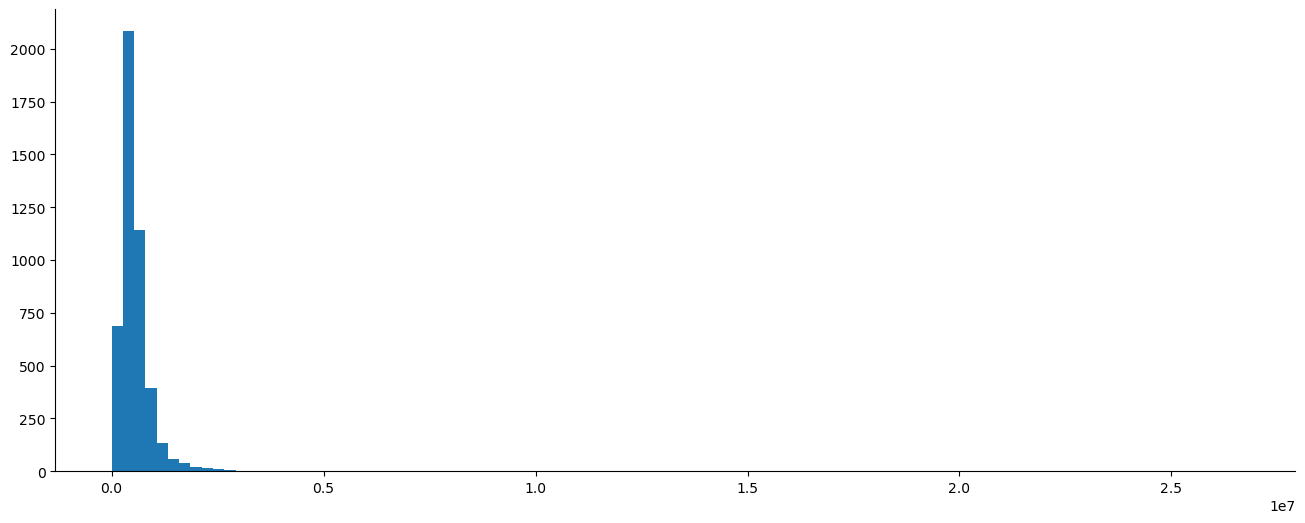

In [8]:
plt.hist(df['price'], bins=100)

In [9]:
from scipy import stats

df['price_z'] = np.abs(stats.zscore(df['price']))
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs,price_z
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0,1,0.423864
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,100,0,0,0,3.249598
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0,0,0.372424
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0,0,0.234071
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0,1,0.003482


In [10]:
df = df[df['price_z'] <= 3]
df.shape

(4566, 17)

(array([ 50.,   0.,   0.,   6.,  12.,  14.,  34.,  52.,  72., 104., 168.,
        197., 177., 191., 201., 183., 177., 180., 179., 183., 184., 154.,
        139., 156., 149., 142., 126., 107.,  82., 108.,  84.,  64.,  72.,
         87.,  53.,  64.,  43.,  57.,  37.,  40.,  31.,  27.,  30.,  30.,
         16.,  16.,  25.,  10.,  13.,  10.,  14.,  13.,   9.,  13.,  15.,
         11.,   7.,   8.,  12.,  10.,   8.,   7.,  10.,   4.,   2.,   2.,
          3.,   3.,   3.,   5.,   5.,   6.,   2.,   4.,   1.,   9.,   3.,
          5.,   2.,   0.,   5.,   2.,   0.,   2.,   4.,   2.,   0.,   3.,
          1.,   3.,   1.,   0.,   2.,   1.,   2.,   1.,   1.,   1.,   2.,
          1.]),
 array([      0.  ,   22388.88,   44777.76,   67166.64,   89555.52,
         111944.4 ,  134333.28,  156722.16,  179111.04,  201499.92,
         223888.8 ,  246277.68,  268666.56,  291055.44,  313444.32,
         335833.2 ,  358222.08,  380610.96,  402999.84,  425388.72,
         447777.6 ,  470166.48,  492555.36,  5

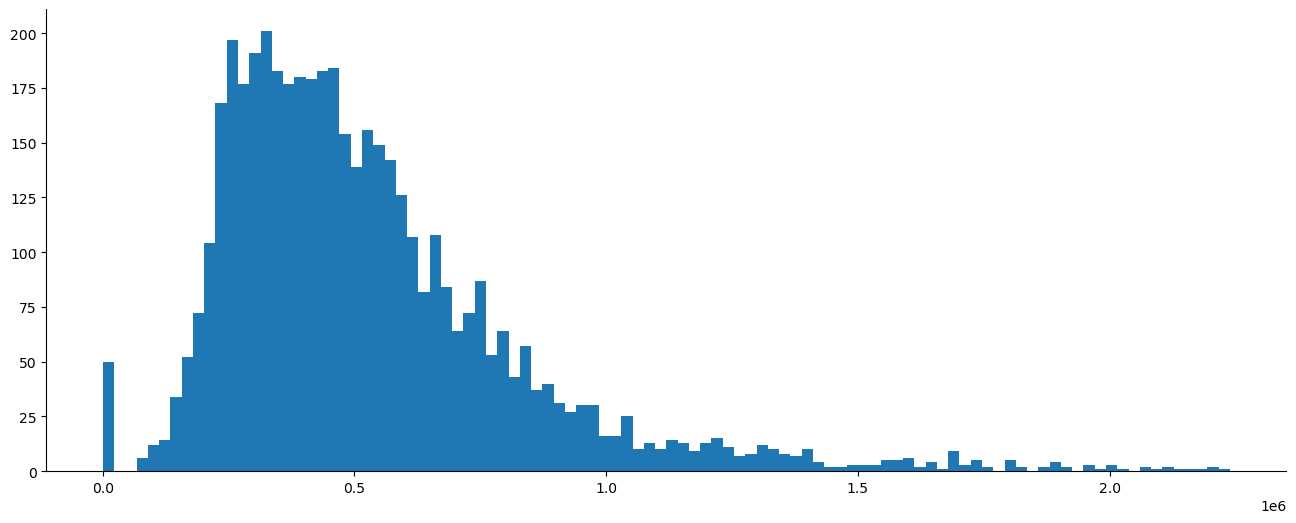

In [11]:
plt.hist(df['price'], bins=100)

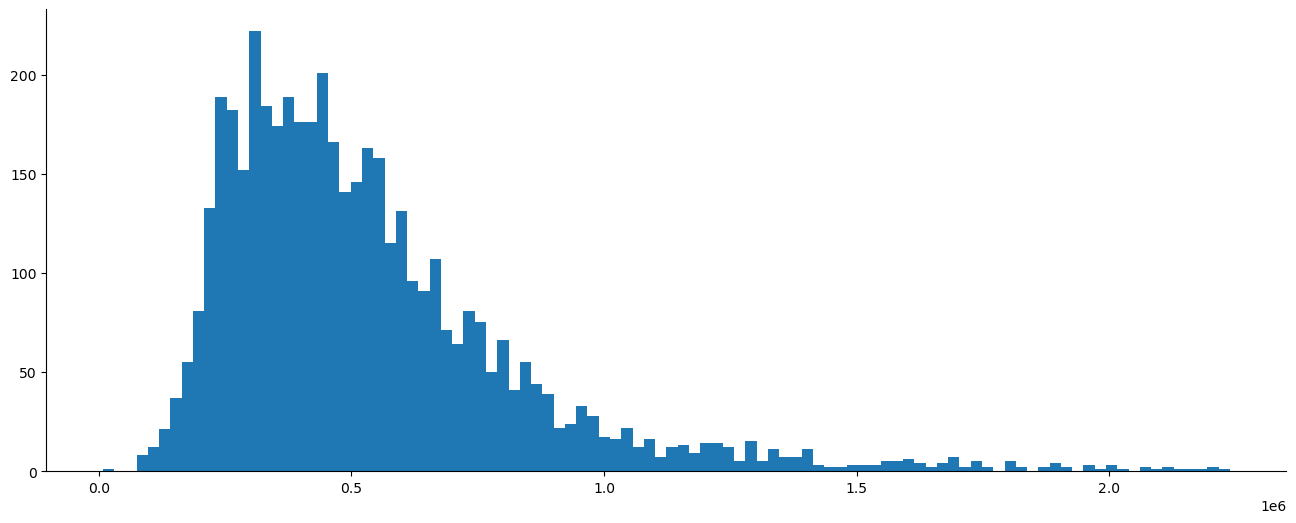

In [13]:
df = df[df['price'] != 0]

plt.hist(df['price'], bins=100);

In [14]:
df = df.drop('price_z', axis=1)

In [16]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

transformer = make_column_transformer(
    (MinMaxScaler(), ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'house_age']),
    (OneHotEncoder(handle_unknown='ignore'), ['bedrooms', 'bathrooms', 'floors', 'view', 'condition'])
)

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3613, 15), (904, 15))

In [18]:
# Fit on the train set
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [19]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [20]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [21]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [22]:
tf.random.set_seed(42)

model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
113/113 [==============================] - 2s 4ms/step - loss: 607123.9375 - rmse: 607142.4375
Epoch 2/100
113/113 [==============================] - 0s 4ms/step - loss: 426855.8750 - rmse: 426674.1250
Epoch 3/100
113/113 [==============================] - 0s 4ms/step - loss: 267784.6562 - rmse: 267759.5000
Epoch 4/100
113/113 [==============================] - 0s 4ms/step - loss: 248372.8750 - rmse: 248314.0938
Epoch 5/100
113/113 [==============================] - 0s 4ms/step - loss: 238548.9219 - rmse: 238616.2656
Epoch 6/100
113/113 [==============================] - 0s 4ms/step - loss: 230374.4062 - rmse: 230324.9688
Epoch 7/100
113/113 [==============================] - 0s 3ms/step - loss: 226733.1875 - rmse: 226701.3281
Epoch 8/100
113/113 [==============================] - 0s 4ms/step - loss: 222336.6250 - rmse: 222366.1875
Epoch 9/100
113/113 [==============================] - 0s 4ms/step - loss: 218483.2500 - rmse: 218426.6562
Epoch 10/100
113/113 [===============

In [23]:
predictions = model.predict(X_test)

29/29 [==============================] - 0s 3ms/step
